In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
airline = pd.read_csv("C:\Excelr\EastWestAirlines (1).csv")

In [3]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline2=airline.drop(['ID#'],axis=1)
airline2


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [7]:
airline2_norm = norm_func(airline2)    #normalized data
airline2_norm


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


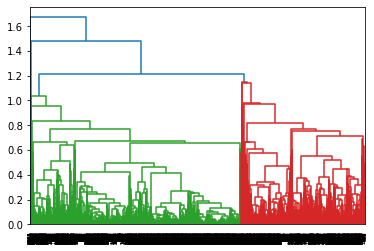

In [8]:
dendrogram = sch.dendrogram(sch.linkage(airline2_norm, method='average'))

In [9]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')   #create clusters

In [10]:
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [11]:
y_hc = hc.fit_predict(airline2_norm)


In [12]:
y_hc

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [13]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [14]:
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,0
...,...
3994,0
3995,0
3996,0
3997,2


In [15]:
airline2['h_clusterid']=hc.labels_

In [16]:
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


<AxesSubplot:xlabel='X', ylabel='Y'>

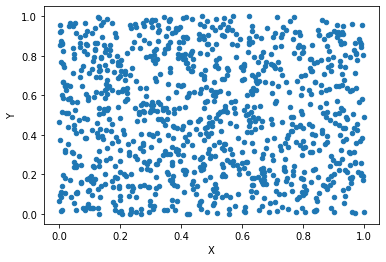

In [18]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [19]:
X = np.random.uniform(0,1,1000)
X

array([8.70374228e-01, 9.64622297e-02, 6.98041308e-01, 8.50770480e-02,
       8.68731719e-01, 7.82399409e-01, 3.93951491e-01, 1.59863381e-01,
       4.84045858e-01, 7.26030640e-02, 2.69554407e-01, 1.34245674e-01,
       2.02294562e-01, 7.95396606e-01, 8.87613101e-01, 3.04161910e-01,
       7.66760661e-01, 6.37715593e-01, 6.67464719e-01, 2.08385893e-01,
       7.01866827e-01, 5.85037883e-01, 6.28539525e-01, 4.91825407e-01,
       1.07645984e-01, 3.72571011e-01, 6.72270536e-01, 8.08031799e-01,
       6.93409723e-01, 8.19301279e-01, 6.65185497e-01, 6.58797681e-02,
       1.96977547e-01, 6.71248905e-01, 9.16114402e-01, 6.32176011e-01,
       9.94714953e-01, 4.30493886e-01, 7.16959136e-01, 3.65442058e-01,
       8.32654095e-01, 5.10722036e-01, 6.34204426e-01, 1.06903046e-01,
       2.02509422e-01, 5.92467429e-01, 7.14219311e-01, 4.11439109e-01,
       1.16358726e-01, 6.90485048e-01, 2.68146739e-01, 4.44334538e-01,
       3.29990407e-01, 4.81668387e-01, 7.47749307e-01, 4.03529721e-01,
      

<AxesSubplot:xlabel='X', ylabel='Y'>

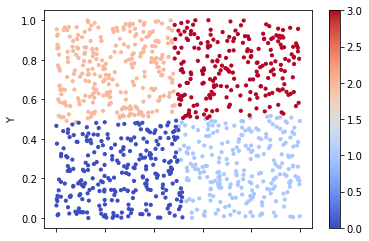

In [20]:
model1 = KMeans(n_clusters=4).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [21]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(airline2_norm.iloc[:,1:])


In [22]:
model=KMeans(n_clusters=4) 
model.fit(df_norm)

model.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [23]:
md=pd.Series(model.labels_)
airline2['clust']=md


In [24]:
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,2,0


In [25]:
airline2_norm.iloc[:,1:5].groupby(airline2_norm.clust).mean()

AttributeError: 'DataFrame' object has no attribute 'clust'

In [26]:
airline2_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [27]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [28]:
airline2_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   cc2_miles          3999 non-null   float64
 4   cc3_miles          3999 non-null   float64
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   float64
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   float64
 10  Award?             3999 non-null   float64
dtypes: float64(11)
memory usage: 343.8 KB


In [29]:
df=airline2_norm.iloc[:,1:5]


In [30]:
df.values

array([[0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       ...,
       [0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ]])

In [31]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)


In [32]:
x

array([[-0.18629869, -0.76957841, -0.09824189, -0.06276658],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, -0.06276658],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658]])

In [33]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [34]:
dbscan.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])


In [36]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [37]:
pd.concat([airline2,cl],axis=1)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clust,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,2,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2,0,0
